In [56]:
# importing pandas and the standard python datetime module
import re
import pandas as pd
import numpy as np
import datetime as dt

# age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target

# importing the data from the csv file
raw_heart = pd.read_csv('heart.csv')

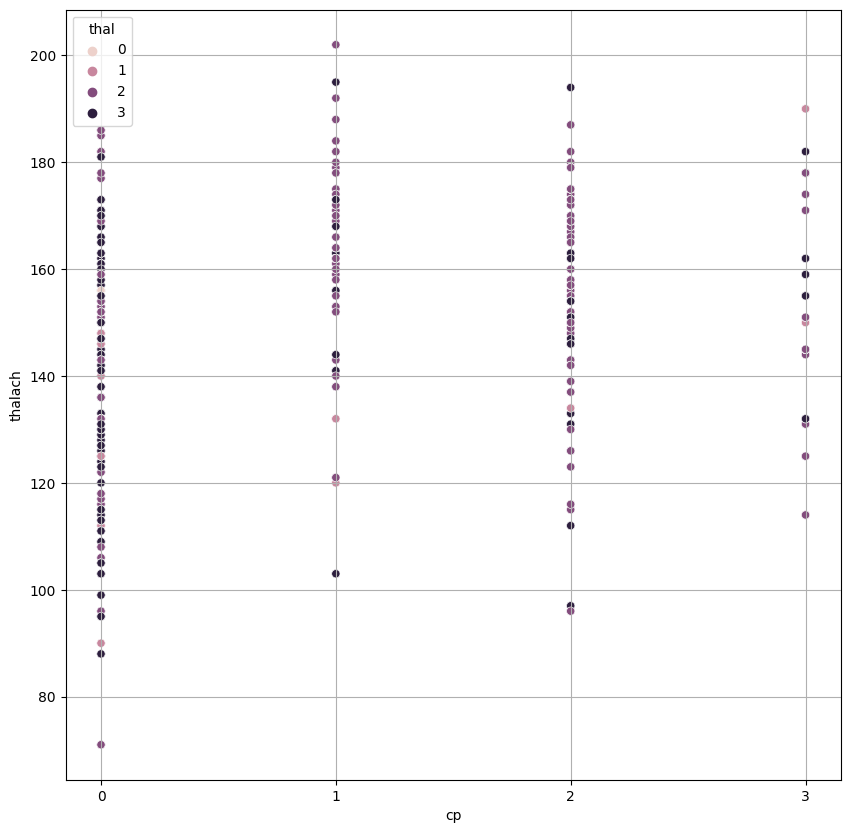

In [55]:
# location plot
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1, figsize=(10, 10))

# sns.scatterplot(data=converted_crimes[converted_crimes['Longitude'].abs() > 1],
#                 x='Longitude', y='Latitude', hue='Area Name', ax=ax)
# sns.scatterplot(data=converted_crimes[converted_crimes['Longitude'].abs() > 1],
#                 x='Longitude', y='Latitude', hue='Day of the week', ax=ax, hue_order=WEEKDAY_CONVERSION)
# ax.set_title('Location of crimes with reference to the time of day (2010 to 2016)')
# plt.grid()

In [59]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# independent and dependent variables
X = raw_heart[['trestbps', 'thalach']]
y = raw_heart['target'].to_numpy()

# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# training
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

# checking accuracy
print(accuracy_score(y_test, predictions))


0.9560975609756097
